In [1]:
import numpy as np
import matplotlib.pyplot as plt

Визулизация отрезков



In [2]:
def vizual(n,x1,x2,y1,y2):
    fig = plt.figure() 
    ax = fig.add_subplot(111) 
    for i in range(n):
        ax.plot([x1[i],x2[i]],[y1[i],y2[i]], color='blue',linewidth=3)
    plt.show()

Координаты начала и конца отрезков

In [3]:
x1_y1_x2_y2 = np.loadtxt("Coordinates.txt")

x1 = x1_y1_x2_y2[0]
y1 = x1_y1_x2_y2[1]
x2 = x1_y1_x2_y2[2]
y2 = x1_y1_x2_y2[3]
print(x1,x2,y1,y2)
n = len(x1)
print(n)

[42.1 76.3 94.  78.4 22.8 12.9 78.9 99.  28.6  4.1 33.8 21.1 73.5 51.9
 81.9 47.4 43.8 96.3  3.3 99.3 38.7 92.7 95.2 37.3 76.2 96.7 91.8 94.6
 74.3  9.7 76.4] [50.5 39.4 13.5 68.1 17.5 62.3 92.  32.5 56.6 80.6 90.4 27.3 71.4 48.
 53.4 25.7 10.1 28.6 64.1 40.4 79.2 12.9 71.2 37.3 10.3  0.5  2.1 29.1
 93.8 82.2 17.8] [88.1 48.4 94.9 76.8 22.  87.  45.1 19.7  1.8 32.9 86.7 53.  63.7 83.4
 30.4 45.9 15.2 10.3 94.1 79.2  3.2 46.9  2.7 43.4 52.9 17.7 15.6 26.
  9.2 69.1 26.7] [95.5 28.4 44.8 99.7 35.  96.  33.7  9.3  1.  21.9 60.8 54.5 28.6 64.
 11.4 59.7 11.2 99.4 22.8 28.8 86.5 38.6 73.  27.2 11.3 67.9 58.5 77.
 70.5 92.7 74.6]
31


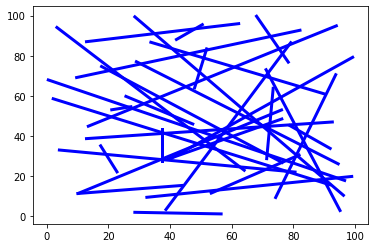

In [4]:
vizual(n,x1,x2,y1,y2)

Ax + By + C = 0

In [5]:
A = np.zeros(n)
B = np.zeros(n)
C = np.zeros(n)

In [6]:
for i in range(n):
    A[i] = y1[i] - y2[i] 
    B[i] = x2[i] - x1[i] 
    C[i] = x1[i]*y2[i] - x2[i]*y1[i]

In [7]:
k_matrix = np.zeros((n, n))
for i in range(n):
    j = i + 1
    while j < n:
        k_matrix[i][j] = A[i]-A[j]
        j += 1

In [8]:
cnt_yes = 0
cnt_not = 0
for i in range(n):
    if cnt_yes == 1:
        print("Пересечение есть")
        break
    else:
        j = i+1
        while j<n:
            if k_matrix[i][j] != 0: 
                # k1 != k2
                # Координата точки пересечения
                x = (C[i+1]*B[i] - C[i]*B[i+1])/(A[i]*B[i+1] - A[i+1]*B[i])
                if min(x1[i], x2[i]) <= x <= max(x1[i], x2[i]) and min(x1[i+1], x2[i+1]) <= x <= max(x1[i+1], x2[i+1]):
                    cnt_yes = 1
                    break
                else:
                    cnt_not += 1
            else:
                # k1 == k2
                if B[i]*C[i+1] == B[i+1]*C[i]:
                    # b1 == b2
                    if x1[i] <= x1[i+1] <= x2[i] or x1[i] <= x2[i+1] <= x2[i]:
                        # Наложение
                        cnt_yes = 1
                        break
                    else:
                        # Лежат на одной прямой, но не накладываются
                        cnt_not += 1
                else:
                    # b1 != b2
                    cnt_not += 1
            if cnt_yes == 1:
                break
            j += 1
if cnt_not == n*(n-1)/2:
    print("Пересечений нет")

Пересечение есть
